# Dashboard Scratch pad for quick testing

Note: the Airpods 3 headphone doesn't have a product description so either try to get it with the free API later or forget about it.

In [2]:
import pandas as pd
from sqlalchemy import create_engine, inspect
import ast

In [3]:
# Connection parameters
server = 'RAVI-DESKTOP\SQLEXPRESS01'
database = 'SentiRec_Analytics'
username = 'RAVI-DESKTOP\RaviB'

# Connection parameters
driver = 'ODBC+Driver+17+for+SQL+Server'  # Adjust the driver name if needed

# Create an SQLAlchemy engine
engine = create_engine(f"mssql+pyodbc://{server}/{database}?driver={driver}")

dataframes_dict = {}

try:
    # Create an inspector to inspect the database and get the tables names
    inspector = inspect(engine)
    table_names = inspector.get_table_names()

    # Load each table into a Pandas DataFrame
    for table_name in table_names:
        df = pd.read_sql_table(table_name, con=engine)
        # Display or process the DataFrame as needed
        dataframes_dict[table_name] = df
    


except pd.errors.DatabaseError as e:
    print("Error reading from the database:", e)

finally:
    # Dispose of the engine
    engine.dispose()

In [4]:
dataframes_dict.keys()

dict_keys(['amazon_product_descriptions', 'amazon_reviews_dim_table', 'averaged_embeddings', 'headphones_fact_table', 'SoundGuys_Data', 'SoundGuys_Summary_Pairs', 'yt_reviews_gen_summaries'])

In [5]:
prod_descriptions = dataframes_dict['amazon_product_descriptions']
#prod_descriptions.drop(prod_descriptions[prod_descriptions['headphoneName'] == 'AirPods 3'].index)

In [6]:
prod_descriptions.columns

Index(['headphoneName', 'URLs', 'title', 'url', 'asin', 'inStock',
       'inStockText', 'brand', 'price', 'stars', 'starsBreakdown',
       'reviewsCount', 'breadCrumbs', 'thumbnailImage', 'galleryThumbnails',
       'highResolutionImages', 'description', 'features', 'attributes',
       'productOverview', 'variantAsins', 'variantDetails', 'reviewsLink',
       'hasReviews', 'delivery', 'variantAttributes', 'manufacturerAttributes',
       'seller', 'bestsellerRanks', 'isAmazonChoice', 'amazonChoiceText',
       'locationText', 'loadedCountryCode', 'unNormalizedProductUrl'],
      dtype='object')

In [7]:
prod_descriptions['description']

0                                                  None
1                                                  None
2                                                  None
3                                                  None
4     Better sound begins with better silence. So Bo...
5     Bose QuietComfort Earbuds II are a sleek, vers...
6     ACTIVE NOISE CANCELLATION: Reduce unwanted noi...
7     Jabra Elite 7 Pro True Wireless EarbudsThe wor...
8     The TF8's stay in place during your most inten...
9     Meet Google Pixel Buds Pro, the noise-cancelin...
10    With best-in-class audio, next generation Adap...
11    LINK BUDS, TRUE WIRELESS, OPEN-RING DESIGN, AL...
12    Automate your audio experience with ultralight...
13    Sony WF-1000XM5 The Best Truly Wireless Blueto...
14    TRUE WIRELESS EARBUDS, NOISE-CANCELING, ALEXA ...
15                                                 None
Name: description, dtype: object

In [8]:
prod_descriptions = prod_descriptions[prod_descriptions['headphoneName'] != 'AirPods 3']
features = prod_descriptions['features'].apply(ast.literal_eval)

In [23]:
features[0]

['New Audio Evolution, Ultimate Music Enjoy :With LDAC technology, Consist of 10mm dynamic driver and a balanced armature, 1MORE EVO creates a new evolution in it’s wireless earbuds project. This unique acoustic cavity design can provide pure studio sound with incredible clarity, punchy bass, crispy vocals, unrivaled details and a wide soundstage which are excellent even at low volumes. And the integration of SoundID technology allows you to customize your music style.',
 'Multiple ANC Modes and Transparency Modes:While there is different kinds of scenarios when you use earphones, so 1MORE EVO supplies 4 active noise cancelling modes and 2 transparency modes in 1MORE MUSIC APP. To improve immersive enjoyment, 1MORE’s proprietary QuietMax active noise cancellation technology providing up to 42dB noise cancellation depth.',
 'Intelligently ANC Mode Adapted to Your Surroundings: When Adaptive ANC is on, the 1MORE EVO recognizes the ambient sounds intelligently, then switches the noise can

In [19]:
prod_descriptions.columns

Index(['headphoneName', 'URLs', 'title', 'url', 'asin', 'inStock',
       'inStockText', 'brand', 'price', 'stars', 'starsBreakdown',
       'reviewsCount', 'breadCrumbs', 'thumbnailImage', 'galleryThumbnails',
       'highResolutionImages', 'description', 'features', 'attributes',
       'productOverview', 'variantAsins', 'variantDetails', 'reviewsLink',
       'hasReviews', 'delivery', 'variantAttributes', 'manufacturerAttributes',
       'seller', 'bestsellerRanks', 'isAmazonChoice', 'amazonChoiceText',
       'locationText', 'loadedCountryCode', 'unNormalizedProductUrl'],
      dtype='object')

In [21]:
prod_descriptions.iloc[0]['title']

'1MORE EVO Noise Cancelling Earbuds, Bluetooth 5.2, Audiophile Headphones with Dual Drivers, Adaptive ANC, HiFi Sound, LDAC, Hi-Res Audio Wireless, 6 Mics for Calls, 28H, Wireless Charging, Black'

In [9]:
headphones_fact_table = dataframes_dict['headphones_fact_table']

In [4]:
headphones_fact_table.head()

,primaryKey,region,ratingScore,priceValue,priceCurrency,listPriceValue,listPriceCurrency,headphoneName,batteryLabel,batteryScore,comfortLabel,comfortScore,noisecancellationLabel,noisecancellationScore,soundqualityLabel,soundqualityScore
0,1,US,1.0,164.970001,USD,NaN,USD,sony xm4 earbuds,Negative,0.894016,Negative,0.886814,None,0.000000,None,0.000000
1,2,US,1.0,164.970001,USD,NaN,USD,sony xm4 earbuds,Positive,0.908510,Positive,0.916273,None,0.000000,Positive,0.908909
2,3,US,1.0,164.970001,USD,NaN,USD,sony xm4 earbuds,Negative,0.499079,None,0.000000,Negative,0.517302,None,0.000000
3,4,US,1.0,164.970001,USD,NaN,USD,sony xm4 earbuds,Negative,0.867483,None,0.000000,Negative,0.843609,None,0.000000
4,5,US,1.0,164.970001,USD,NaN,USD,sony xm4 earbuds,Negative,0.885287,None,0.000000,Negative,0.832005,Negative,0.846645


In [13]:
headphones_fact_table.shape
(headphones_fact_table['batteryScore'] == 0).sum()

1010

In [5]:
battery_df = headphones_fact_table[['headphoneName', 'batteryLabel', 'batteryScore']].loc[headphones_fact_table['batteryScore'] != 0]
battery_df.shape

(476, 3)

In [21]:
battery_df = headphones_fact_table[['headphoneName', 'batteryLabel', 'batteryScore']]
battery_df = battery_df[battery_df['batteryScore'] != 0]
assert (battery_df['batteryScore'] == 0).sum() == 0
battery_df.shape

(476, 3)

In [19]:
assert (battery_df['batteryScore'] == 0).sum() == 0, "There are zero values in the 'batteryScore' column."

In [22]:
noisecancellation_df = headphones_fact_table[['headphoneName', 
                                              'noisecancellationLabel', 
                                              'noisecancellationScore']
                                            ].loc[headphones_fact_table['noisecancellationScore'] != 0]

In [33]:
noisecancellation_df[noisecancellation_df['noisecancellationLabel'] == 'Neutral']

,headphoneName,noisecancellationLabel,noisecancellationScore
1252,Soundcore Liberty 3,Neutral,0.941952


In [9]:
battery_df[battery_df['headphoneName'] == 'sony xm4 earbuds']
battery_df.groupby(['headphoneName', 'batteryLabel']).mean()

batteryScore
headphoneName               batteryLabel              
1MORE Evo                   Negative          0.769466
                            Positive          0.865957
AirPods 3                   Negative          0.887797
                            Positive          0.840079
AirPods Pro 2 Earbuds       Negative          0.838483
                            Positive          0.902657
Beats Fit Pro Earbuds       Negative          0.872616
                            Neutral           0.371096
                            Positive          0.821054
Bose Quietcomfort Earbuds   Negative          0.809765
                            Positive          0.790599
Bose Quietcomfort Earbuds 2 Negative          0.792137
                            Positive          0.799833
Galaxy Buds2 Pro            Negative          0.897082
                            Positive          0.823262
Jabra Elite 7 Pro           Negative          0.804701
                            Positive          0.838446
Pixel Buds Pro              Negative          0.786385
                            Neutral           0.456170
                            Positive          0.839263
Sennheiser MTW3             Negative          0.830954
                            Positive          0.727581
Sony Linkbuds S             Negative          0.828472
                            Positive          0.762581
Sony Linkbuds original      Negative          0.791140
                            Positive          0.751124
Sony WF-1000XM5             Negative          0.828710
                            Neutral           0.768681
                            Positive          0.863777
Soundcore Liberty 3         Negative          0.853249
                            Neutral           0.553545
                            Positive          0.830641
lg tone tf8                 Negative          0.574770
                            Positive          0.932193
sony xm4 earbuds            Negative          0.835615
                            Positive          0.793415

In [16]:
battery_df[battery_df['batteryLabel'] == 'Positive']

,batteryLabel,batteryScore
1,Positive,0.908510
10,Positive,0.958688
11,Positive,0.799859
15,Positive,0.982470
16,Positive,0.929207
...,...,...
1452,Positive,0.996748
1459,Positive,0.807490
1460,Positive,0.966179
1470,Positive,0.526243


In [41]:
filtered_df = battery_df[battery_df['headphoneName'] == '1MORE Evo']

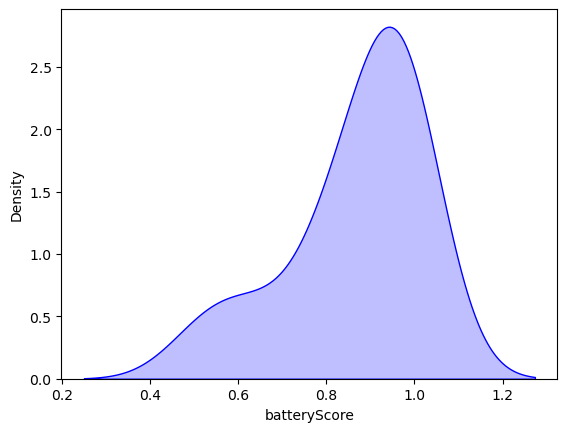

In [46]:
import seaborn as sns
selected_aspect = 'battery'
scatter_data = filtered_df[filtered_df[f'{selected_aspect}Label'] == 'Positive']
sns_kde = sns.kdeplot(scatter_data[f'{selected_aspect}Score'], color='blue', fill=True, common_norm=False, legend=False)

array([0.32941633, 0.33394577, 0.33847521, 0.34300465, 0.34753409,
       0.35206352, 0.35659296, 0.3611224 , 0.36565184, 0.37018128,
       0.37471072, 0.37924016, 0.3837696 , 0.38829904, 0.39282848,
       0.39735792, 0.40188736, 0.4064168 , 0.41094624, 0.41547568,
       0.42000512, 0.42453456, 0.42906399, 0.43359343, 0.43812287,
       0.44265231, 0.44718175, 0.45171119, 0.45624063, 0.46077007,
       0.46529951, 0.46982895, 0.47435839, 0.47888783, 0.48341727,
       0.48794671, 0.49247615, 0.49700559, 0.50153502, 0.50606446,
       0.5105939 , 0.51512334, 0.51965278, 0.52418222, 0.52871166,
       0.5332411 , 0.53777054, 0.54229998, 0.54682942, 0.55135886,
       0.5558883 , 0.56041774, 0.56494718, 0.56947662, 0.57400606,
       0.57853549, 0.58306493, 0.58759437, 0.59212381, 0.59665325,
       0.60118269, 0.60571213, 0.61024157, 0.61477101, 0.61930045,
       0.62382989, 0.62835933, 0.63288877, 0.63741821, 0.64194765,
       0.64647709, 0.65100652, 0.65553596, 0.6600654 , 0.66459

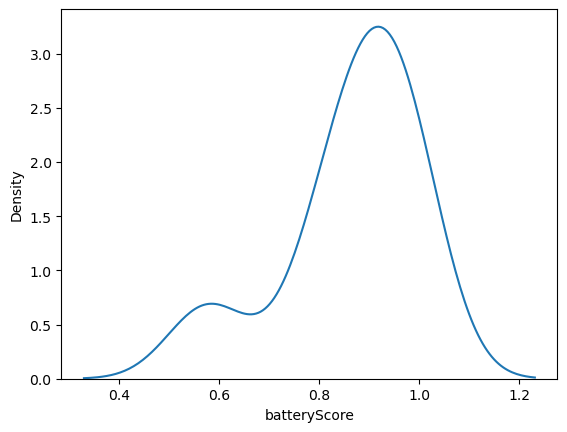

In [36]:
my_kde = kdeplot(scatter_data[f'{selected_aspect}Score'], fill=True, common_norm=False, legend=False)
my_kde.get_lines()[0].get_xdata()

In [15]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
            x=sns_kde.get_lines()[0].get_xdata(),
            #x=scatter_data[f'{selected_aspect}Score'],
            y=sns_kde.get_lines()[0].get_ydata(),
            mode='lines',
            name=sentiment_label,
            line=dict(color=color, width=2),
            opacity=0.7
        ))

IndexError: list index out of range

### Exploring Headphone Images

In [13]:
from PIL import Image
import ast
import requests
from io import BytesIO
#from IPython.display import Image, display 
from rembg import remove 

In [25]:
prod_descriptions['headphoneName']

0                       1MORE Evo
2           AirPods Pro 2 Earbuds
3           Beats Fit Pro Earbuds
4       Bose Quietcomfort Earbuds
5     Bose Quietcomfort Earbuds 2
6                Galaxy Buds2 Pro
7               Jabra Elite 7 Pro
8                     lg tone tf8
9                  Pixel Buds Pro
10                Sennheiser MTW3
11         Sony Linkbuds original
12                Sony Linkbuds S
13                Sony WF-1000XM5
14               sony xm4 earbuds
15            Soundcore Liberty 3
Name: headphoneName, dtype: object

In [9]:
selected_row = prod_descriptions[prod_descriptions['headphoneName'] == 'AirPods Pro 2 Earbuds']
selected_row

,headphoneName,URLs,title,url,asin,inStock,inStockText,brand,price,stars,...,delivery,variantAttributes,manufacturerAttributes,seller,bestsellerRanks,isAmazonChoice,amazonChoiceText,locationText,loadedCountryCode,unNormalizedProductUrl
2,AirPods Pro 2 Earbuds,https://www.amazon.ca/Apple-AirPods-Generation...,Apple AirPods Pro (2nd Generation) with MagSaf...,https://www.amazon.ca/dp/B0CHWRXH8B,B0CHWRXH8B,True,In Stock Only 5 left in stock.,Apple,"{'value': 269.98, 'currency': '$'}",4.6,...,"Thursday, January 4","[{'key': 'Style', 'value': 'USB-C Connector'}]",[],"{'name': 'Amazon.ca', 'id': None, 'url': '/b?n...",None,False,None,Update location,None,https://www.amazon.ca/Apple-AirPods-Generation...


In [45]:
selected_row['highResolutionImages']

2    ['https://m.media-amazon.com/images/I/61SUj2aK...
Name: highResolutionImages, dtype: object

In [46]:
urls = ast.literal_eval(selected_row['highResolutionImages'][2])
urls

['https://m.media-amazon.com/images/I/61SUj2aKoEL._AC_SL1500_.jpg',
 'https://m.media-amazon.com/images/I/61sRKTAfrhL._AC_SL1500_.jpg',
 'https://m.media-amazon.com/images/I/51emillNpWL._AC_SL1500_.jpg',
 'https://m.media-amazon.com/images/I/51+vJkbGtJL._AC_SL1500_.jpg',
 'https://m.media-amazon.com/images/I/5121OBX4JIL._AC_SL1500_.jpg',
 'https://m.media-amazon.com/images/I/51aHwMRyg7L._AC_SL1500_.jpg']

In [47]:
url=urls[0]

In [49]:
response = requests.get(url)
img = Image.open(BytesIO(response.content))
translucent_img = remove(img)
#translucent_img
#img.save('image.png', format='PNG')

In [16]:
url = 'https://github.com/RavinderRai/SentiRec-Analytics/blob/main/streamlit_prototype/translucent_images/1MORE%20Evo.png?raw=true'

In [24]:
def get_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

#get_image(url)

In [23]:
def get_image(url):
    response = requests.get(url)
    img_data = response.content
    return img_data

get_image(url)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xdc\x00\x00\x05\xdc\x08\x06\x00\x00\x0085Ld\x00\x01\x00\x00IDATx\x9c\xec\xfd\xe9\xaf$\xd9y&x>\xef\xd9lq\xf7\xbb\xc6\x9a\x91\x91\xcc$E-%\x15f\x1a\x8d)\xcc4\xea\xeb\x003h\xcc\xcc\x7f\xd9\xdf\x06\x184f\x80.\xd4t\xa9\xab \xb1T\\D\x89\xa4(QL\xe6\xc2\xdcb\x8f\xb8\xf7\xfab\xcb9\xe7\xed\x0ff\xe6\xe1\xe1yoD\xe4\xc2-\xf9\xfc\xa4Ks737777\xbf\x91\xf7\xb1\xd7\xdf\x03\x10\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x

#### Getting Translucent images for headphones

In [56]:
#get the max width and height out of all these images
max_height = 0
max_width = 0
for index, row in prod_descriptions.iterrows():
    urls = ast.literal_eval(row['highResolutionImages'])
    url = urls[0]
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    width, height = img.size
    
    if width > max_width:
        max_width = width
    if height > max_height:
        max_height = height
    
print(f"Max Image size: {max_width} x {max_height}")

Max Image size: 1500 x 1500


In [51]:
for index, row in prod_descriptions.iterrows():
    file_name = row['headphoneName'] + '.png'
    
    urls = ast.literal_eval(row['highResolutionImages'])
    #the first image is the one with the earbuds and white background
    url = urls[0]
    
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    translucent_img = remove(img)
    file_path = '../streamlit_prototype/translucent_images/'
    translucent_img.save(file_path+file_name, format='PNG')

Below we get each image and pad them to be the same size of 1500x1500, and then remove the white background so they are translucent.

In [58]:
from PIL import ImageOps

# Define the desired output size
output_size = (1500, 1500)


# Iterate through the dataframe and resize/paste each image onto the blank image
for index, row in prod_descriptions.iterrows():
    file_name = row['headphoneName'] + '.png'
    
    # Create a blank white image of the desired size
    blank_image = Image.new('RGB', output_size, color='white')
    
    urls = ast.literal_eval(row['highResolutionImages'])
    url = urls[0]
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    
    # Resize the image to fit within the output size while preserving aspect ratio
    img.thumbnail(output_size)
    
    # Calculate the position to paste the image onto the blank image (centered)
    position = ((output_size[0] - img.width) // 2, (output_size[1] - img.height) // 2)
    
    # Paste the image onto the blank image
    blank_image.paste(img, position)
    
    translucent_img = remove(blank_image)
    
    file_path = '../streamlit_prototype/translucent_images/'
    translucent_img.save(file_path+file_name, format='PNG')

    # Save or display the resulting image
    #file_path = 'headphone_images_padded/'
    #blank_image.save(file_path + file_name, format='PNG')

## Getting Generated Youtube Summaries

In [10]:
yt_df = dataframes_dict['yt_reviews_gen_summaries']
yt_df.head(3)

,primaryKey,video_id,title,video_link,channel_name,review_text,headphoneName,generated_summaries
0,0,0L4tO4HDjnU,Sony WF-1000XM4 Earbuds Review - 6 Months Later,https://www.youtube.com/watch?v=0L4tO4HDjnU,6 Months Later,"The Sony WF-1000XM4 earbuds, which is a mouth...",sony xm4 earbuds,The Sony WF-1000XM4 earbuds are a great value ...
1,1,hIWn_RjN-Wg,I&#39;m ditching my AirPods Pros - Sony WF-100...,https://www.youtube.com/watch?v=hIWn_RjN-Wg,ShortCircuit,(wind rushing) (slow music) - As much as I lo...,sony xm4 earbuds,Sony's WF-1000XM4s have a new integrated V1 pr...
2,2,fMw1h4hKT_E,Sony WF-1000XM4 review: silence to my ears,https://www.youtube.com/watch?v=fMw1h4hKT_E,The Verge,so it's been almost two years since sony relea...,sony xm4 earbuds,The wf-1000xm4 earbuds cost 279 dollars.They'r...


In [14]:
selected_headphone = '1MORE Evo'
filtered_yt_df = yt_df[yt_df['headphoneName'] == selected_headphone]


In [20]:
filtered_yt_df['generated_summaries'].iloc[0]

"The 1MORE Evo earbuds come in white and black.They boast 28 hours of playback time on a single charge.They can also charge via USBC. 10 millimeter dynamic driver, plus a balanced armature driver for punchy bass and smooth mids.Internal mic is for ambient sound rejection. ANC is gonna take that to another level.It is surprising how far we've come for anything other than an Apple or a Bose product. In this test, Jono goes through and dials in a customized EQ.They're priced right up there with what you would expect for a pair of feature rich, wireless in ears.But they also aren't intended to be, they don't have a wire. It would also be really nice if it spat out the EQ."

In [ ]:
filtered_yt_df['channel_name'][0]

In [21]:
filtered_yt_df.shape

(6, 8)

In [35]:
filtered_yt_df['video_link'][0]

'https://www.youtube.com/watch?v=0L4tO4HDjnU'

In [52]:
import re
input_string = filtered_yt_df['generated_summaries'][0]
output_string = re.sub(r'\s*\.\s*', '. ', input_string)
output_string

"The Sony WF-1000XM4 earbuds are a great value at $279. They have the best noise cancellation of any buds I've tried. They have one of the best sound profiles of any buds I’ve tried. They also support Sony’s LDAC which gets you higher quality audio over bluetooth. The Sony Pixel Buds have a touch surface that can register a single, double, or triple tap, plus a long press, which is something most other buds I’ve tried just can’t do. You can customize what you want each tap to register as in the Sony app. I’ve never run out of battery while listening to these and they’re rated for 8 hours of battery and the charge in the case will get you up to another 16 hours. The Sony WF-XM4s are the best noise canceling earbuds I've ever used. They've worked great on my Samsung and Pixel phones, plus with Android you get LDAC quality streaming. The only issue I ever ran into is when I had them in and I turned transparency mode on, it just turned off transparency mode without any input from me. I thi

In [53]:
def get_yt_summaries(df, row):
    youtuber = df['channel_name'][row]
    vid_link = df['video_link'][row]
    summary = df['generated_summaries'][row]
    cleaned_summary = re.sub(r'\s*\.\s*', '. ', summary)
    return youtuber, vid_link, cleaned_summary

In [54]:
youtuber, vid_link, summary = get_yt_summaries(filtered_yt_df, 0)
print(youtuber)
print(vid_link)
print(summary)

6 Months Later
https://www.youtube.com/watch?v=0L4tO4HDjnU
The Sony WF-1000XM4 earbuds are a great value at $279. They have the best noise cancellation of any buds I've tried. They have one of the best sound profiles of any buds I’ve tried. They also support Sony’s LDAC which gets you higher quality audio over bluetooth. The Sony Pixel Buds have a touch surface that can register a single, double, or triple tap, plus a long press, which is something most other buds I’ve tried just can’t do. You can customize what you want each tap to register as in the Sony app. I’ve never run out of battery while listening to these and they’re rated for 8 hours of battery and the charge in the case will get you up to another 16 hours. The Sony WF-XM4s are the best noise canceling earbuds I've ever used. They've worked great on my Samsung and Pixel phones, plus with Android you get LDAC quality streaming. The only issue I ever ran into is when I had them in and I turned transparency mode on, it just tur

#### Exploring Get Recommendations File

In [17]:
import numpy as np
import pandas as pd
import argparse
from ast import literal_eval
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from Get_Recommendations import HeadphoneRecommendations

In [18]:
reviews_df = dataframes_dict['averaged_embeddings']
reviews_df = reviews_df.drop(reviews_df[reviews_df['headphoneName'] == 'AirPods 3'].index)
reviews_df

,headphoneName,ProductEmbedding
0,1MORE Evo,"[-0.06718464195728302, 0.051035076379776, -0.1..."
2,AirPods Pro 2 Earbuds,"[-0.07013950496912003, 0.06712871044874191, -0..."
3,Beats Fit Pro Earbuds,"[-0.06112515553832054, 0.056722816079854965, -..."
4,Bose Quietcomfort Earbuds,"[-0.06966901570558548, 0.05094931274652481, -0..."
5,Bose Quietcomfort Earbuds 2,"[-0.06322579085826874, 0.05420923978090286, -0..."
6,Galaxy Buds2 Pro,"[-0.07899948209524155, 0.08394227176904678, -0..."
7,Jabra Elite 7 Pro,"[-0.0671735405921936, 0.0659547969698906, -0.1..."
8,lg tone tf8,"[-0.07814421504735947, 0.05790264585188457, -0..."
9,Pixel Buds Pro,"[-0.07331924140453339, 0.09483595192432404, -0..."
10,Sennheiser MTW3,"[-0.0849185585975647, 0.04515042155981064, -0...."


In [19]:
print(type(reviews_df['ProductEmbedding'][0]))
reviews_df['ProductEmbedding'] = reviews_df['ProductEmbedding'].apply(literal_eval)
print(type(reviews_df['ProductEmbedding'][0]))

<class 'str'>
<class 'list'>


In [20]:
#eviews_df = pd.read_csv('averaged_embeddings.csv', converters={'ProductEmbedding': literal_eval})
recommendations = HeadphoneRecommendations(model_file='glove_model.gensim', reviews_df=reviews_df)

In [21]:
top_recommendations = recommendations.get_recommendation('A headphone with really good battery life')
print("Top 5 Recommendations:")
print(top_recommendations[0])

KeyError: 'Headphone_Name'

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/yt_reviews_gen_summaries.csv')

In [9]:
df.head(3)

,Unnamed: 0,video_id,title,video_link,channel_name,review_text,headphone,generated_summaries
0,0,0L4tO4HDjnU,Sony WF-1000XM4 Earbuds Review - 6 Months Later,https://www.youtube.com/watch?v=0L4tO4HDjnU,6 Months Later,"The Sony WF-1000XM4 earbuds, which is a mouth...",sony xm4 earbuds,The Sony WF-1000XM4 earbuds are a great value ...
1,1,hIWn_RjN-Wg,I&#39;m ditching my AirPods Pros - Sony WF-100...,https://www.youtube.com/watch?v=hIWn_RjN-Wg,ShortCircuit,(wind rushing) (slow music) - As much as I lo...,sony xm4 earbuds,Sony's WF-1000XM4s have a new integrated V1 pr...
2,2,fMw1h4hKT_E,Sony WF-1000XM4 review: silence to my ears,https://www.youtube.com/watch?v=fMw1h4hKT_E,The Verge,so it's been almost two years since sony rele...,sony xm4 earbuds,The wf-1000xm4 earbuds cost 279 dollars.They'r...


In [1]:
from google.cloud import bigquery
import os

In [2]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../streamlit_prototype/sentirec-analytics-service-key.json"

In [3]:
# Create a client object using the default credentials
client = bigquery.Client()

In [4]:
query = """
SELECT *
FROM `sentirec-analytics.reviews_data.averaged_embeddings`
"""

# Execute the query
query_job = client.query(query)

# Fetch the results
results = query_job.result()

In [7]:
def get_bq_df(client, table, dataset='reviews_data', project_id='sentirec-analytics'):
    query = f"""
    SELECT *
    FROM `{project_id}.{dataset}.{table}`
    """
    query_job = client.query(query)
    return query_job.to_dataframe()

In [10]:
get_bq_df(client, 'headphones-fact-table')

,headphoneName,batteryLabel,batteryScore,comfortLabel,comfortScore,noisecancellationLabel,noisecancellationScore,soundqualityLabel,soundqualityScore,region,ratingScore,priceValue,priceCurrency,listPriceValue,listPriceCurrency
0,sony xm4 earbuds,Negative,0.894016,Negative,0.886814,None,0.000000,None,0.000000,US,1.0,164.97,USD,NaN,USD
1,sony xm4 earbuds,None,0.000000,None,0.000000,None,0.000000,None,0.000000,US,1.0,164.97,USD,NaN,USD
2,sony xm4 earbuds,Negative,0.836177,None,0.000000,None,0.000000,None,0.000000,US,1.0,164.97,USD,NaN,USD
3,sony xm4 earbuds,None,0.000000,None,0.000000,None,0.000000,None,0.000000,US,1.0,164.97,USD,NaN,USD
4,sony xm4 earbuds,Negative,0.745369,None,0.000000,None,0.000000,None,0.000000,US,5.0,164.97,USD,NaN,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,Sony WF-1000XM5,Positive,0.977330,Negative,0.871431,Positive,0.614684,Positive,0.877473,CAD,4.0,328.00,CAD,NaN,CAD
1482,Sony WF-1000XM5,Positive,0.778247,None,0.000000,Positive,0.764168,Positive,0.809848,CAD,4.0,328.00,CAD,NaN,CAD
1483,Sony WF-1000XM5,None,0.000000,Neutral,0.352800,Positive,0.624279,Positive,0.592801,CAD,4.0,328.00,CAD,NaN,CAD
1484,1MORE Evo,Positive,0.635573,Positive,0.649680,Positive,0.745552,Positive,0.640101,CAD,4.0,124.99,CAD,NaN,CAD


In [11]:
prod_descriptions = get_bq_df(client, 'amazon_product_descriptions')

In [14]:
prod_descriptions = prod_descriptions.rename({'Headphones': 'headphoneName'}, axis = 1)

In [16]:
prod_descriptions.columns

Index(['headphoneName', 'URLs', 'title', 'url', 'asin', 'inStock',
       'inStockText', 'brand', 'price', 'stars', 'starsBreakdown',
       'reviewsCount', 'breadCrumbs', 'thumbnailImage', 'galleryThumbnails',
       'highResolutionImages', 'description', 'features', 'attributes',
       'productOverview', 'variantAsins', 'variantDetails', 'reviewsLink',
       'hasReviews', 'delivery', 'variantAttributes', 'manufacturerAttributes',
       'seller', 'bestsellerRanks', 'isAmazonChoice', 'amazonChoiceText',
       'locationText', 'loadedCountryCode', 'unNormalizedProductUrl'],
      dtype='object')

In [17]:
from google.cloud import storage

# Initialize a client
storage_client = storage.Client()

# Specify the bucket and file name
bucket_name = 'glove_model_sentirec_analytics'
blob_name = 'glove_model.gensim'

In [43]:
bucket = storage_client.bucket(bucket_name)

In [44]:
glove_model = bucket.blob('glove_model.gensim')
glove_model_vectors = bucket.blob('glove_model.gensim.vectors.npy')

In [45]:
glove_model.download_to_filename('glove_model.gensim')
glove_model_vectors.download_to_filename('glove_model.gensim.vectors.npy')

In [52]:
glove_model_url = f"gs://{bucket_name}/glove_model.gensim"
glove_model = KeyedVectors.load(glove_model_url)

OSError: [Errno 22] Invalid argument: 'gs://glove_model_sentirec_analytics/glove_model.gensim.vectors.npy'

In [49]:
file_names = ['glove_model.gensim', 'glove_model.gensim.vectors.npy']

# Access the files directly from GCS
glove_model_uri = f"{bucket_name}/glove_model.gensim"
glove_model_vectors_uri = f"gs://{bucket_name}/glove_model.gensim.vectors.npy"

# Use the URIs to access the files in your Streamlit app
# For example, load the GloVe model file
with open(glove_model_uri, 'rb') as f:
    glove_model_data = f.read()

FileNotFoundError: [Errno 2] No such file or directory: 'glove_model_sentirec_analytics/glove_model.gensim'

In [50]:
glove_model_url = f"https://console.cloud.google.com/storage/browser/{bucket_name}/glove_model.gensim"

In [29]:
from gensim.models import KeyedVectors

In [51]:
glove_model = KeyedVectors.load(glove_model_url)

UnpicklingError: invalid load key, '<'.

In [38]:
translucent_images = storage_client.list_blobs(bucket_name, prefix='translucent_images')

In [42]:
# List objects in the bucket with the specified prefix
bucket = storage_client.bucket(bucket_name)
blobs = bucket.list_blobs(prefix='translucent_images')

# Create a directory to store downloaded files
output_dir = 'translucent_images'
os.makedirs(output_dir, exist_ok=True)

# Download each object in the prefix to the output directory
for blob in blobs:
    # Extract the file name from the blob name
    file_name = os.path.basename(blob.name)
    # Download the blob to the output directory
    blob.download_to_filename(os.path.join(output_dir, file_name))